In [1]:
import os, sys, glob
import json, csv, re, datetime
import pickle
import collections
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm as cm
from tqdm import tqdm
from collections import Counter

In [2]:
phases_engage_base = "/localdata/u6314203/segfit_res_engage16"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [3]:
def display_stat1(test_category, phasesData, save_base='figs/tmp/'):
    # fig1: end_first_phase
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    bin_width = 25
    bins = [x for x in range(min(phasesData["end_first_phase"])//bin_width*bin_width,
                             max(phasesData["end_first_phase"])//bin_width*bin_width+bin_width, bin_width)]
    ax.hist(phasesData["end_first_phase"], rwidth=0.9, bins=bins, log=False)
    ax.set_ylim(bottom=1)
    ax.set_xticks(bins)
    ax.set_title("End day of first phase in engage16 ({})".format(test_category))
    ax.set_xlabel("Day")
    ax.set_ylabel("Num. videos")
#     plt.savefig(save_base+"last_day({}, logY)".format(test_category))

In [4]:
def display_stat2(test_category, phasesData, save_base='figs/tmp/'):
    # fig1: num_phases
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    categories = pd.Series(phasesData['num_phases']).value_counts().index
    counts = pd.Series(phasesData['num_phases']).value_counts().values
    ax.bar(categories, counts, width=0.8, log=False)
    
    ax.set_ylim(bottom=1)
    ax.set_title("Total fitted phases in engage16 ({})".format(test_category))
    ax.set_xlabel("Num. phases")
    ax.set_ylabel("Num. videos")
#     plt.savefig(save_base+"last_day({}, logY)".format(test_category))

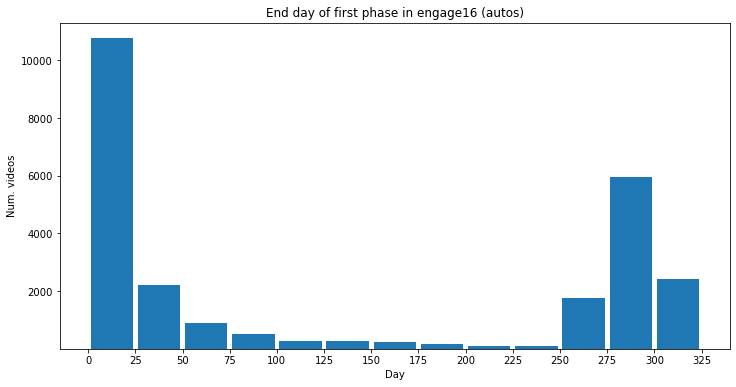

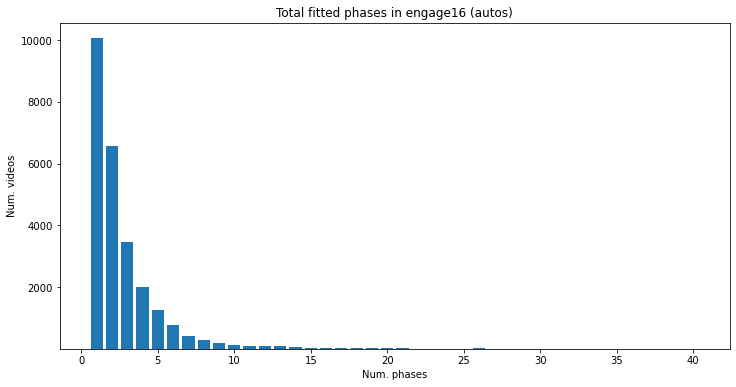

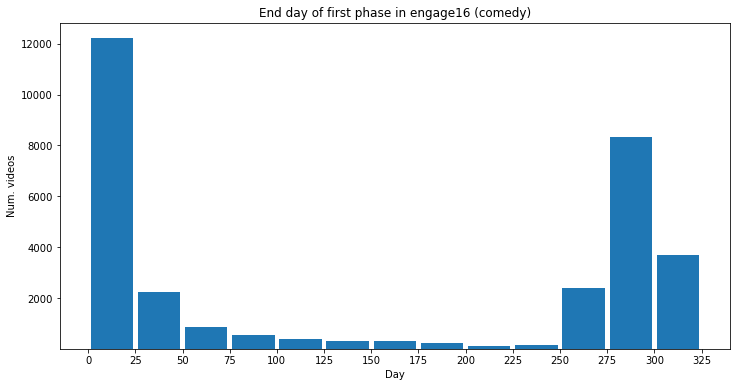

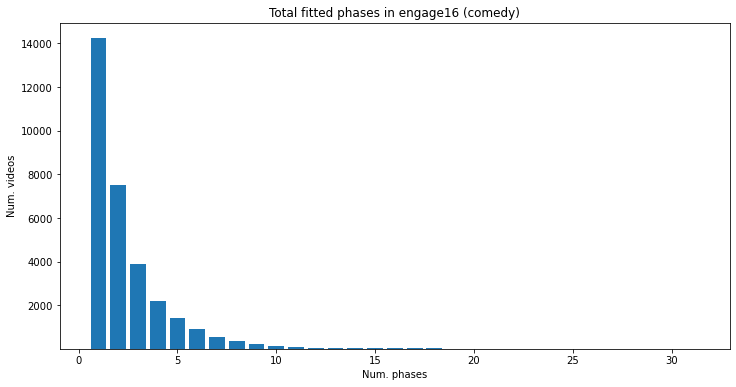

In [5]:
for category in categories_eligible[:2]:
    phasesData = None
    phasesFile = os.path.join(phases_engage_base, "{}.json".format(category))
    with open(phasesFile, "r") as f:
        phasesData = json.load(f)
        
    display_stat1(category, phasesData)
    display_stat2(category, phasesData)